<a href="https://colab.research.google.com/github/AdrianAlbrecht/Collab/blob/main/SSI_sterownik_rozmyty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [685]:
import warnings
warnings.filterwarnings('ignore')
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.markers import MarkerStyle
from matplotlib.transforms import Affine2D

In [686]:
class PojazdPolozenie:
    def __init__(self, x, y, kat):
        self.x = x
        self.y = y
        self.kat = kat #-180...+180 stopni, 0= oznacza zwrot do góry, 90=zwrot w prawo

auto = PojazdPolozenie(20.0,-170.0,-170.00)

In [687]:
class SymulacjaParametry:
    x_min = -100
    x_max = 100
    x_zasieg = 200
    y_min = -100
    y_max = 0
    y_zasieg = 100
    #rampa
    rampa_lewy = -30
    rampa_prawy = +30
    rampa_dol = -10
    rampa_gora = 0
    rampa_kat_docelowy_min = -20
    rampa_kat_docelowy_max = +20
    #ruch
    obrot_min = -20
    obrot_max = +20
    kat_min = -180
    kat_max = +180
    kat_zasieg = 360
    ruch_skok = 5.0


sym_params = SymulacjaParametry()

In [688]:
def euclidean_distance(x1, x2):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(x1, x2)))

In [689]:
class SterownikRozmyty:
    symulacja: SymulacjaParametry
    ciezarowka: PojazdPolozenie
    trasa: list[list[int, int]]

    def __init__(self, sym_params, pojazd):
        self.symulacja = sym_params
        self.ciezarowka = pojazd
        self.trasa = [[pojazd.x, pojazd.y, pojazd.kat]]

    def kat_do_celu(self):
        dest_x = (self.symulacja.rampa_lewy + self.symulacja.rampa_prawy) / 2
        dest_y = self.symulacja.rampa_gora
        return math.degrees(math.atan2(dest_x - self.ciezarowka.x, dest_y - self.ciezarowka.y))

    def sterownik(self):
        kat = self.kat_do_celu()
        print(f'{kat} vs {self.ciezarowka.kat}')
        roznica_katow = self.ciezarowka.kat - kat
        if kat < self.ciezarowka.kat:
            if roznica_katow >= self.symulacja.obrot_max:
                return self.symulacja.obrot_min
            elif self.symulacja.obrot_min < roznica_katow < self.symulacja.obrot_max:
                return -roznica_katow
        elif kat > self.ciezarowka.kat:
            if -roznica_katow >= self.symulacja.obrot_max:
                return self.symulacja.obrot_max
            elif self.symulacja.obrot_min < -roznica_katow < self.symulacja.obrot_max:
                return -roznica_katow
        return 0

    def symuluj(self, margines):
        dest_x = (self.symulacja.rampa_lewy + self.symulacja.rampa_prawy) / 2
        dest_y = self.symulacja.rampa_gora

        while not((dest_x - margines <= self.ciezarowka.x <= dest_x + margines) and (dest_y - margines <= self.ciezarowka.y <= dest_y + margines)):
            self.ciezarowka.kat += self.sterownik()

            if holowczyc := euclidean_distance([self.ciezarowka.x, self.ciezarowka.y], [dest_x, dest_y]) > self.symulacja.ruch_skok:
                za_100_metrow_prosto = self.symulacja.ruch_skok
            else:
                za_100_metrow_prosto = holowczyc

            radiany = math.radians(90 - self.ciezarowka.kat if self.ciezarowka.kat <= 90 else self.ciezarowka.kat - 90)
            self.ciezarowka.x += round((za_100_metrow_prosto * math.cos(radiany)),2)
            self.ciezarowka.y += round((za_100_metrow_prosto * math.sin(radiany)),2)
            polozenie = [self.ciezarowka.x, self.ciezarowka.y]
            self.trasa.append(polozenie+[self.ciezarowka.kat])
            print(f'Aktualne polozenie ciezarowki: {polozenie+[self.ciezarowka.kat]}')
            print(f'Punkt docelowy: {[dest_x, dest_y]}')
        return self.trasa

In [690]:
st_rozmyty = SterownikRozmyty(sym_params, auto)
trasa = st_rozmyty.symuluj(1)

-6.7098368077569335 vs -170.0
Aktualne polozenie ciezarowki: [17.5, -174.33, -150.0]
Punkt docelowy: [0.0, 0]
-5.7323946881703955 vs -150.0
Aktualne polozenie ciezarowki: [13.67, -177.54000000000002, -130.0]
Punkt docelowy: [0.0, 0]
-4.402900696535452 vs -130.0
Aktualne polozenie ciezarowki: [8.969999999999999, -179.25000000000003, -110.0]
Punkt docelowy: [0.0, 0]
-2.864796555733856 vs -110.0
Aktualne polozenie ciezarowki: [3.969999999999999, -179.25000000000003, -90.0]
Punkt docelowy: [0.0, 0]
-1.2687702269352703 vs -90.0
Aktualne polozenie ciezarowki: [-0.7300000000000013, -177.54000000000002, -70.0]
Punkt docelowy: [0.0, 0]
0.23558456312494175 vs -70.0
Aktualne polozenie ciezarowki: [-4.560000000000001, -174.33, -50.0]
Punkt docelowy: [0.0, 0]
1.4983605346894016 vs -50.0
Aktualne polozenie ciezarowki: [-7.060000000000001, -170.0, -30.0]
Punkt docelowy: [0.0, 0]
2.3780934883545553 vs -30.0
Aktualne polozenie ciezarowki: [-7.9300000000000015, -165.08, -10.0]
Punkt docelowy: [0.0, 0]
2

In [691]:
trasa

[[20.0, -170.0, -170.0],
 [17.5, -174.33, -150.0],
 [13.67, -177.54000000000002, -130.0],
 [8.969999999999999, -179.25000000000003, -110.0],
 [3.969999999999999, -179.25000000000003, -90.0],
 [-0.7300000000000013, -177.54000000000002, -70.0],
 [-4.560000000000001, -174.33, -50.0],
 [-7.060000000000001, -170.0, -30.0],
 [-7.9300000000000015, -165.08, -10.0],
 [-7.690000000000001, -160.09, 2.750221267425088],
 [-7.450000000000001, -155.1, 2.7501163603622203],
 [-7.210000000000001, -150.10999999999999, 2.7500047029729062],
 [-6.970000000000001, -145.11999999999998, 2.7498856220661505],
 [-6.73, -140.12999999999997, 2.7497583518590667],
 [-6.49, -135.13999999999996, 2.749622017490931],
 [-6.25, -130.14999999999995, 2.7494756148847976],
 [-6.01, -125.15999999999995, 2.7493179859764187],
 [-5.77, -120.16999999999996, 2.7491477880175554],
 [-5.529999999999999, -115.17999999999996, 2.7489634552312716],
 [-5.289999999999999, -110.18999999999997, 2.7487631504998262],
 [-5.049999999999999, -105.1

In [692]:
def wizualizacja(symulacja, trasa):
    plt.figure(figsize=(15, 10))
    aktualna_trasa = []
    for x_t in trasa:
        aktualna_trasa.append(x_t)
        x = [punkt[0] for punkt in aktualna_trasa]
        y = [punkt[1] for punkt in aktualna_trasa]
        dest_x = (symulacja.rampa_lewy + symulacja.rampa_prawy) / 2
        dest_y = symulacja.rampa_gora
        strzalka_kierunkowa = MarkerStyle(marker=10, transform=Affine2D().rotate_deg(-x_t[-1]))
        plt.plot([symulacja.rampa_lewy, symulacja.rampa_lewy, symulacja.rampa_prawy, symulacja.rampa_prawy], [symulacja.rampa_gora, symulacja.rampa_dol, symulacja.rampa_dol, symulacja.rampa_gora], color='r', linestyle='dotted')
        plt.plot(x,y,color='black',linestyle='dotted')
        plt.scatter(dest_x, dest_y, color='green', marker = 's', s = 200)
        plt.scatter(x_t[0],x_t[1], color='black', marker = strzalka_kierunkowa, s = 100)


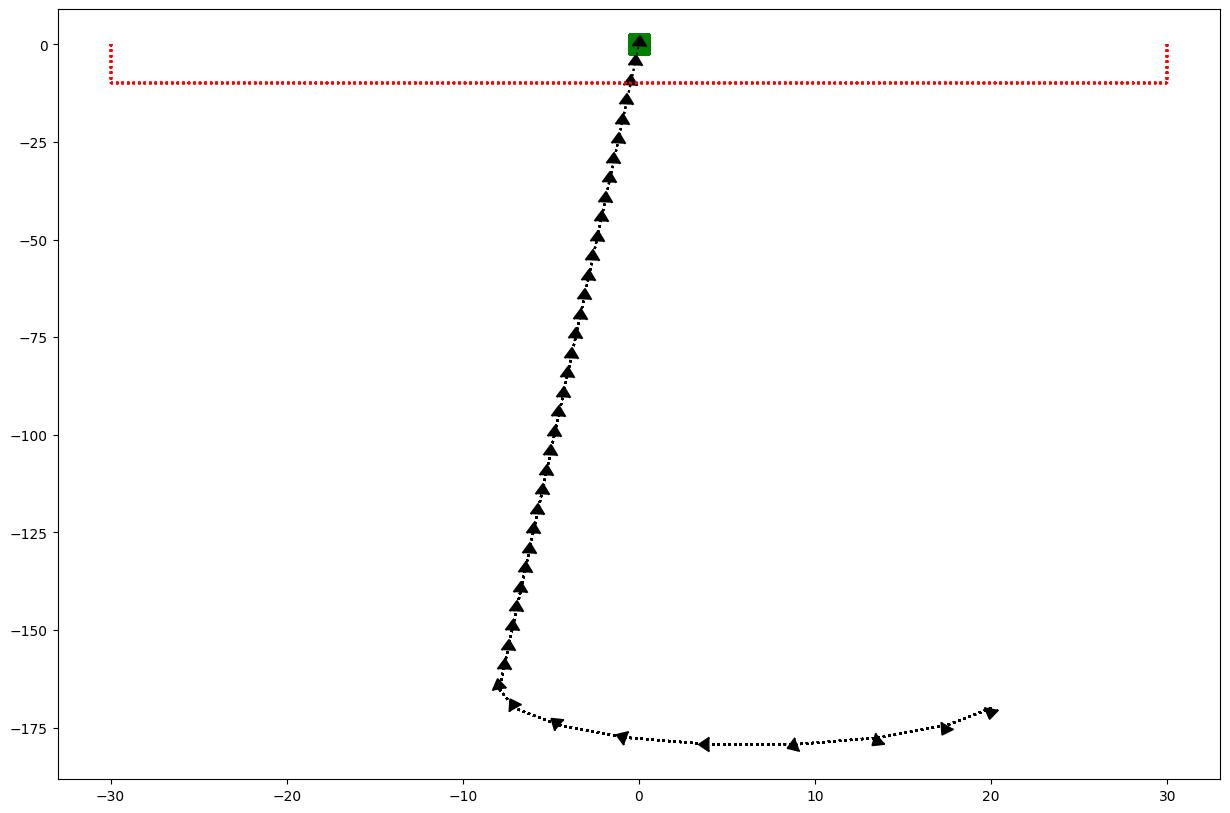

In [693]:
wizualizacja(sym_params, trasa)